In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [56]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [57]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [58]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [59]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## create model

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5236 - accuracy: 0.8179
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3931 - accuracy: 0.8600
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3582 - accuracy: 0.8706
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3327 - accuracy: 0.8786
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3154 - accuracy: 0.8840


In [42]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3423 - accuracy: 0.8803 - 751ms/epoch - 2ms/step

Test accuracy: 0.880299985408783


In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [27]:
predictions[0]

array([7.2445267e-16, 1.1212380e-28, 1.0374325e-25, 8.9220045e-32,
       1.1674268e-18, 4.7797634e-08, 9.0306136e-18, 6.6763062e-07,
       4.0131176e-21, 9.9999928e-01], dtype=float32)

In [72]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [80]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

plot_image(1, predictions, test_labels,img)

NameError: name 'true_label' is not defined

In [76]:
test_labels


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

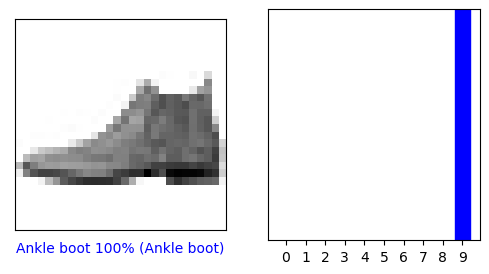

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

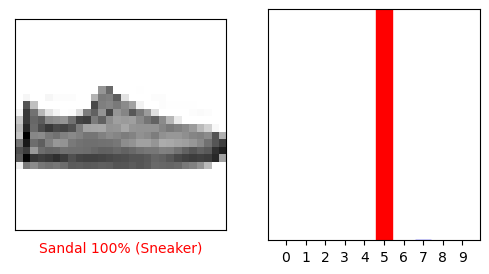

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

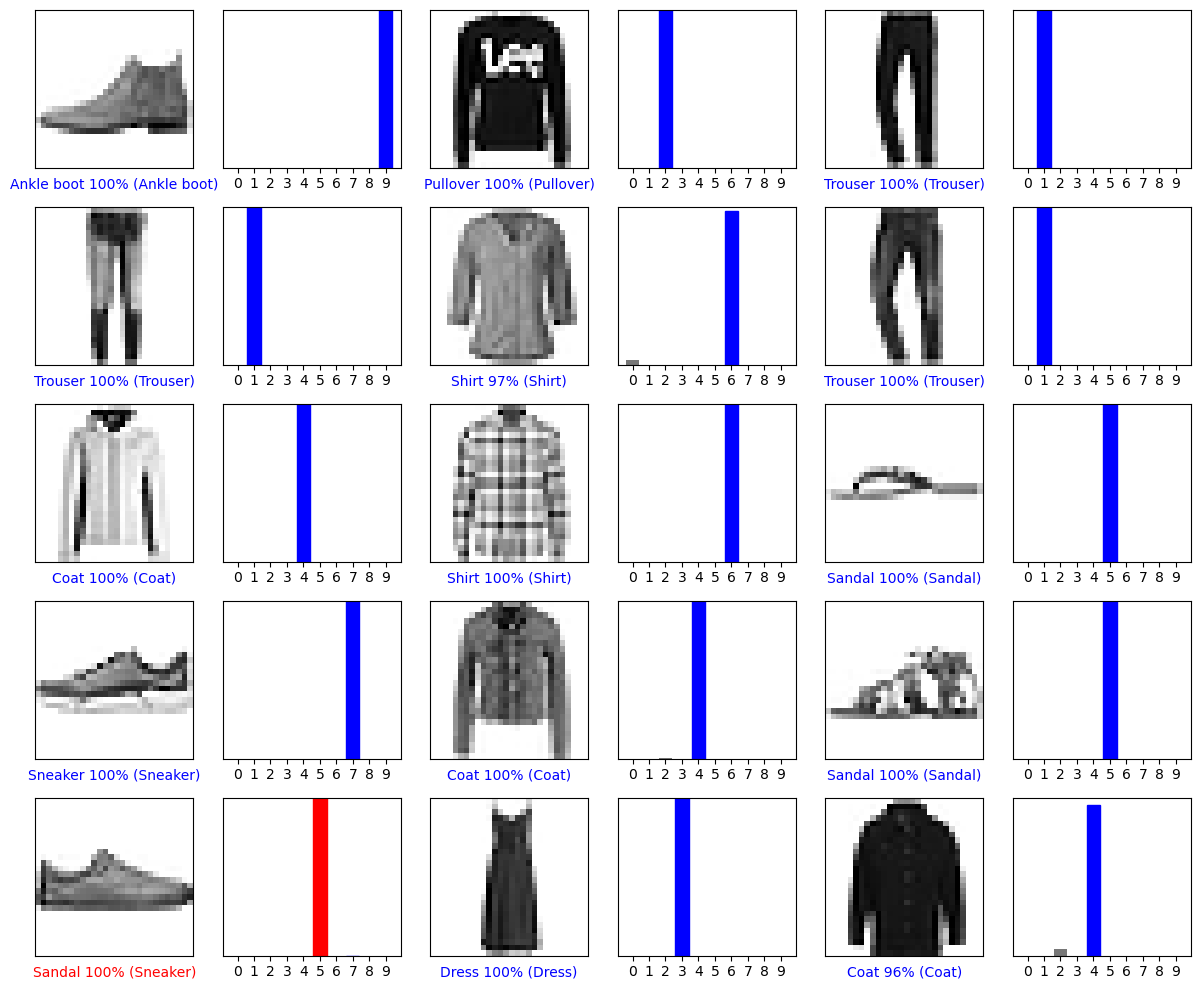

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [34]:
img = test_images[1]

print(img.shape)

(28, 28)


In [35]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 53ms/step
[[5.3181640e-05 9.0259452e-30 9.9986219e-01 5.4017109e-26 8.1209102e-05
  4.8749312e-30 3.2906094e-06 0.0000000e+00 1.5306178e-20 3.1848787e-34]]


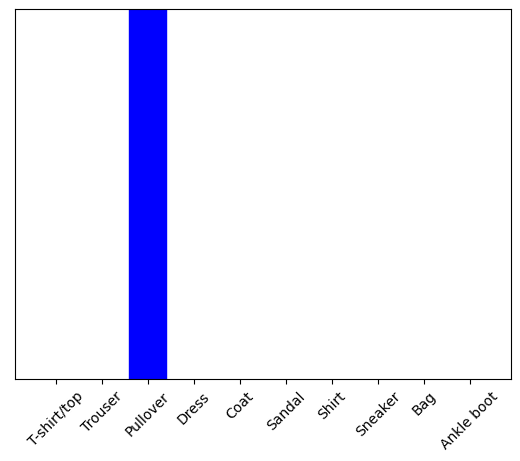

In [37]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [38]:
np.argmax(predictions_single[0])

2